<a href="https://colab.research.google.com/github/yash121299/PyTorch_Learning/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Exploring a PyTorch workflow end-to-end.

Resources:
* Ground Truth notebook (Github Link) - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book Version (Online Notebook) - https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a Question (Github Discussions page) - https://github.com/mrdbourke/pytorch-deep-learning/discussions

What we are covering:

1. Data (preparing and loading)
2. Build model
3. Fitting the model to data (training)
4. Making predictions and evaluating a model (inference)
5. Saving and loading a model
6. Putting it all together

In [ ]:
# Making this into a dictonary so we can reference to it later on in the code
what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "Making predictions and evaluating the model (inference)",
    5: "Saving and loading the model",
    6: "Putting it all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'Making predictions and evaluating the model (inference)',
 5: 'Saving and loading the model',
 6: 'Putting it all together'}

In [ ]:
#Importing Libraries
import torch
from torch import nn # nn contains all of Pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

print(torch.__version__)

2.6.0+cu124


`nn` Module Documentation - https://docs.pytorch.org/docs/stable/nn.html

`nn` contains the building blocks (mostly layers) for neural networks. Our job is to organize those layers to create any type of neural networks. A neural network is basically a computational graph.

## 1.Data (Preparing and Loading)

Data can be almost anything... in machine learning.

* Excel Spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine Learning (Deep Learning) is a game of 2 parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation


To showcase this, let's create some *known* data using the linear regression formula

     The general equation for a linear regression is y = mx + b, where:

      y: is the dependent variable (the one you're trying to predict)

      x: is the independent variable (the one you're using to make predictions)

      m: is the slope of the line (also called gradient), representing the change in y for every unit change in x

      b: is the y-intercept, representing the value of y when x is zero.

We'll use the linear regression formula to make a straight line with *known* **parameters**.

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3
# These terms are very common in neural networks but for our current goal, in the linear regression formula -> m is weights and b is bias

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X),len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Lets create a training and test set for our data

In [ ]:
# Create a train/test split
train_split = int(0.8 * len(X))
train_split

40

In [ ]:
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

In [ ]:
len(X_train),len(y_train)

(40, 40)

In [ ]:
len(X_test),len(y_test)

(10, 10)

how might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, Visualize and Visualize!"

Documentation for `plt.scatter` - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

In [ ]:
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot the training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")

  # Plot the test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")

  # Plotting predictions if they exist else dont
  if predictions is not None:
    # Plotting predictions in red
    plt.scatter(test_data,predictions,c = "r",s=4,label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14})

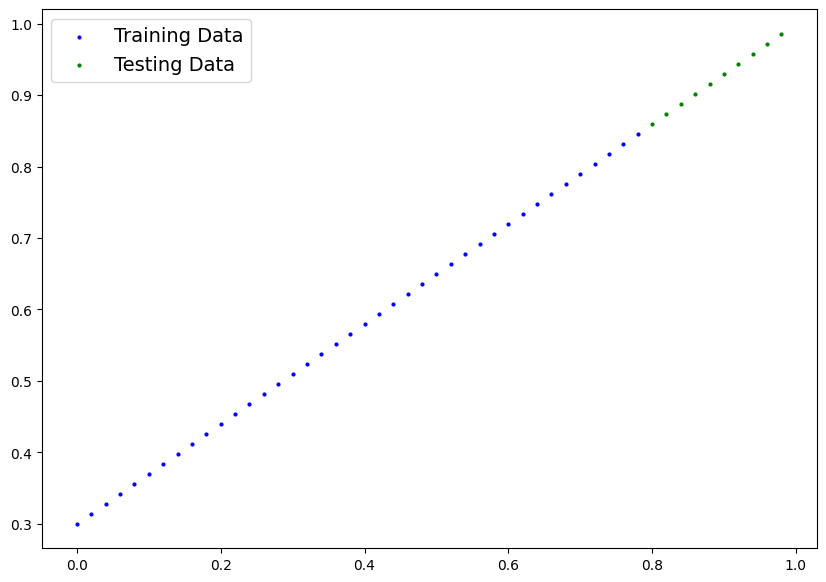

In [ ]:
plot_predictions() # Since we hardcoded the inputs we can just run as is without input params

Blue dots are input , green dots are ideal output

Red dots would be the predictions. Since we dont have any predictions yet, the red dots are missing.

An ideal (perfect) model would have the red dots exactly over the green dots.



## 2. Build model

Our first PyTorch model!

Linear Regression Info - https://en.wikipedia.org/wiki/Linear_regression

We are going to be building classes throughout the course. To get familiar with OOP in Python go through the following link

Classes in Python - https://realpython.com/python3-object-oriented-programming/

One iteration of an computation that looks like the linear regression equation is called forward computation

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to the ideal values/representation) the ideal values (the weight & bias) values we used for creating the data


How does it do so?
Through 2 main algorithms:
1. Gradient Descent
2. Backpropagation

Gradient Descent is why we have requires_grad as True. What that does is when we run computations for the model, PyTorch will track the gradients for the parameters (weights and bias) which will then update the parameters through a combination of Gradient Descent and Backpropagation. PyTorch has this implemented so that we dont have to and we can write the high level code for the models to trigger these.

Resources for more information:

Gradient Descent - https://medium.com/@abhaysingh71711/gradient-descent-explained-the-engine-behind-ai-training-2d8ef6ecad6f

https://www.3blue1brown.com/lessons/gradient-descent



Backpropagation - https://www.ibm.com/think/topics/backpropagation

https://www.3blue1brown.com/lessons/backpropagation



In [ ]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module (Lego building brick for PyTorch models)
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) # Start with random and update, requires grad to track gradient, torch.float is the default type
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) # Start with random and update, requires grad to track gradient, torch.float is the default type

  # Forward method to define the computation in the model
  def forward(self,x:torch.Tensor) -> torch.Tensor: # <- Here, "x" is the input data (in our current case its the training data)
    return self.weights*x + self.bias # this is the linear regression formula

`nn.Module` Documentation - https://docs.pytorch.org/docs/stable/generated/torch.nn.Module.html

`nn.Parameter` Documentation - https://docs.pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html

`torch.randn` Documentation - https://docs.pytorch.org/docs/2.7/generated/torch.randn.html

### PyTorch model building essentials

* `torch.nn` - contains all of the building blocks for computational graphs (a neural can be considered a computational graph)
* `torch.nn.Parameter` - What parameters should our model try and learn (Often a layer from torch.nn will set these for us)
* `torch.nn.Module` - The base class for all neural network modules, if you subclass it you have to overwrite forward()
* `torch.optim` - This is where the optimizers in Pytorch live, they will help with Gradient Descent
* `def forward()` -  All nn.Module subclasses require you to ovewrite forward(), this method defines what happens in the forward computation


Best resource is the Pytorch Cheatsheet - https://docs.pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Seeing whats inside our model. We can check our or model parameters or what is inside our model using `.parameters()`

In [ ]:
# Create a random seed (for uniformity)
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

model_0

LinearRegressionModel()

In [ ]:
# Checking out the parameters of our model
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters of the model
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Known parameters declared initially to generate data
weight,bias

(0.7, 0.3)

Our goal with the model is to get these random named parameter values for weights and bias to get as close to or match the values for the known parameters weight & bias

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, its going to run it through our `forward()` method

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

We use a context manager i.e. `torch.inference_mode()` here. We could do it without this and we would still get the output but with also a grad funtion in the predictions.


What inference mode does is that it turns off the gradient tracking. Since we are doing inference and not training we dont need to keep track of gradients. Which makes it so pytorch is keeping track of less numbers in the background giving us a performance boost.

See more on inference mode here: https://x.com/PyTorch/status/1437838231505096708?lang=en

inference mode is new, old way is torch.no_grad(). A lot of people use this but there are some advantages to inference mode over no grad which are mentioned on the above link

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

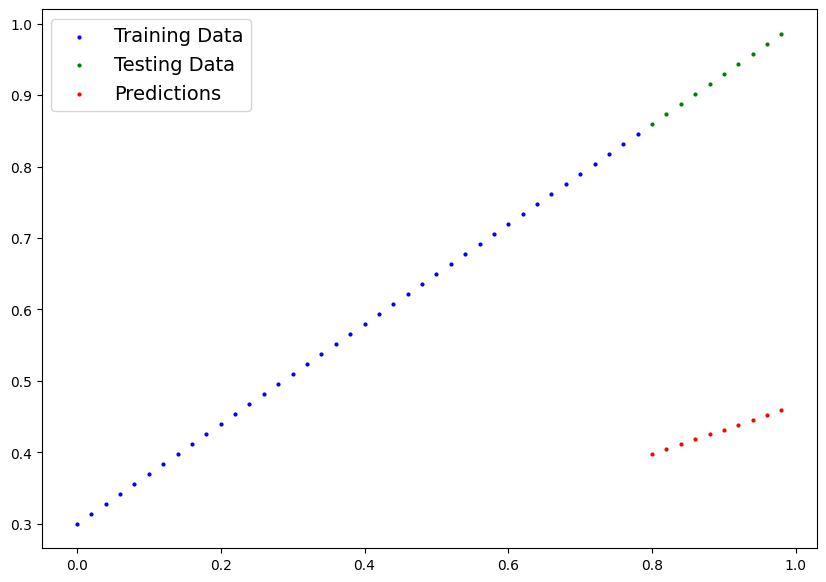

In [ ]:
plot_predictions(predictions=y_preds)

## Training a Model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters

Or in other words from a poor representation of the data to a better representation of data

One way to measure how poor/how wrong the predictions are of our model -> Use a loss function (also called a criterion or a cost function)


Pytorch has many inbuilt loss functions -  https://docs.pytorch.org/docs/stable/nn.html#loss-functions

Optimizers in PyTorch - https://docs.pytorch.org/docs/stable/optim.html (SGD and its iterations are very popular)

Parameter -> Something that the model sets by itself, HyperParameter -> Something that we set as a programmer


Note: Throughout the course, We're going to refer to it as loss function

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, **lower is better**

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (Eg. weight & bias in our case) to improve the loss function
  * Inside the optimizer, you'll often have to set two parameters:
    * `params` - the model parameters you'd like to optimize, for example in our case: params=model_0.prarmeters
    * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters at each step (a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop



We will be using the `L1Loss` in our case, which is basically the mean absolute error

Documentation - https://docs.pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (Stochastic  Gradient Descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set. Smaller the learning rate-> smaller the adjustment in the model parameters and vice versa

In [ ]:
loss_fn

L1Loss()

In [ ]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

Which loss function and optimizer should I use?

Problem sprecific. Trail and Error is key. For regression problems like ours -> a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` should work fine.

But for classification problems like dog vs cat images, we would likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss)

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do following...
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on the data - also called Forward Propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss  (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyper parameter because we have set it ourselves)
epochs = 1
### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred,y_train) # Check documentation for order of predictions and true labels, is different for different loss functions
  print(f"Loss: {loss}")
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform back propagation on the loss with respect to the parametets of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop soo we have to zero them above in step 3 for the next iteration of the loop

  # model_0.eval() # turns off gradient tracking

Loss: 0.31288138031959534


In [ ]:
# Parameters modified after running many epochs
model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

In [ ]:
# True known parameters
weight,bias

(0.7, 0.3)

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

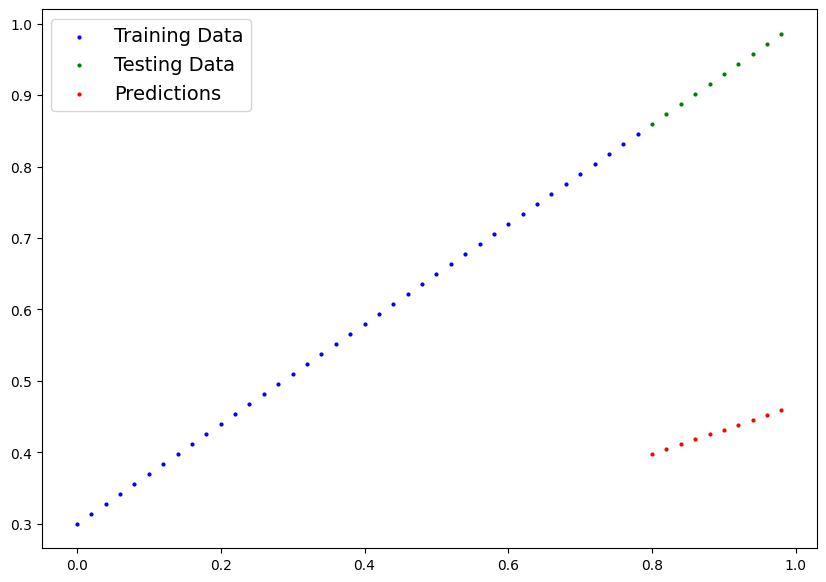

In [ ]:
# Old predictions
plot_predictions(predictions=y_preds)

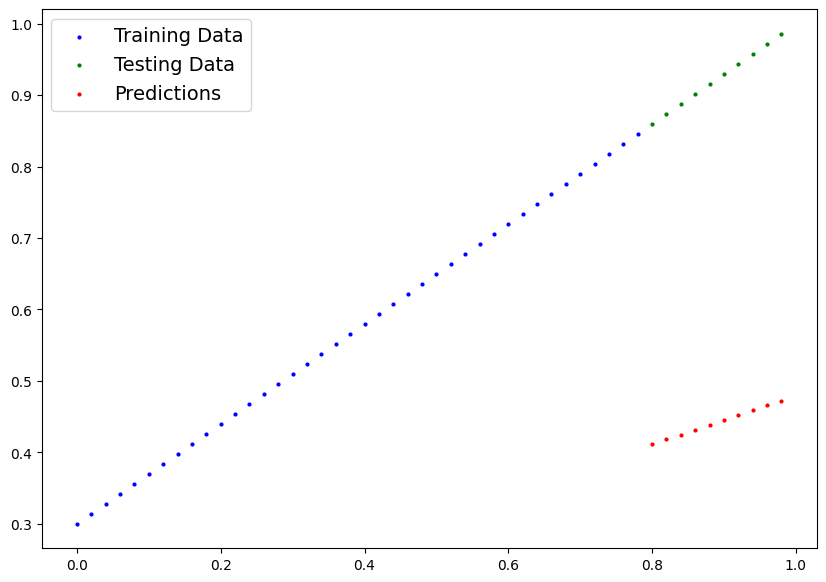

In [ ]:
# New predictions after a few epochs (About 15-20 epochs)
plot_predictions(predictions=y_preds_new)

In [ ]:
# Running the training loop for 100 more epochs
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyper parameter because we have set it ourselves)
epochs = 100
### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred,y_train) # Check documentation for order of predictions and true labels, is different for different loss functions
  print(f"Loss: {loss}")
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform back propagation on the loss with respect to the parametets of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop soo we have to zero them above in step 3 for the next iteration of the loop

  # model_0.eval() # turns off gradient tracking

Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Loss: 0.08227583020925522
Loss: 0.07638873159885406
Loss: 0.07160007208585739
Loss: 0.06747635453939438
Loss: 0.06395438313484192
Loss: 0.06097004935145378
Loss: 0.05845819041132927
Loss: 0.05635259300470352
Loss: 0.0545857772231102
Loss: 0.053148526698350906
Loss: 0.05181945487856865
Loss: 0.05069301277399063
Loss: 0.0498228520154953
Loss: 0.04895269125699997
Loss: 0.04819351062178612
Loss: 0.047531817108392715
Loss: 0.04692792519927025
Loss: 0.04642331600189209
Loss: 0.045918710529

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])

In [ ]:
with torch.inference_mode():
  y_preds_newest = model_0(X_test)

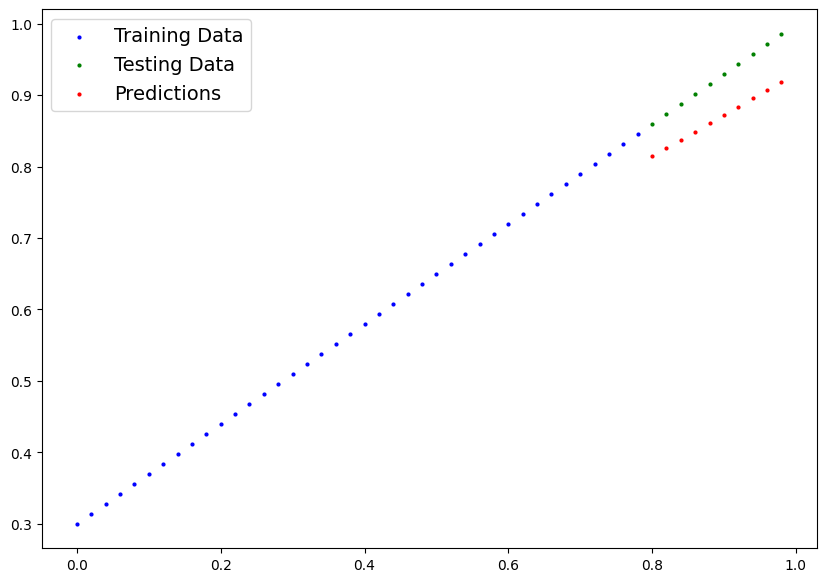

In [ ]:
# Predictions after 100 more epochs (Pretty close to ideal)
plot_predictions(predictions=y_preds_newest)

In [ ]:
# Adding our testing code (testing loop) to the existing training loop
# Re initializing the model to make sure we dont have the earlier training, starting with a fresh model instance with random parameters
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyper parameter because we have set it ourselves)
epochs = 200

# Track different values to compare future models to current model for research and comparison and visualize the loss value through the training
epoch_count = []
loss_values = []
test_loss_values = []
### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred,y_train) # Check documentation for order of predictions and true labels, is different for different loss functions
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform back propagation on the loss with respect to the parametets of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop soo we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (like dropout/batchnorm layers)

  with torch.inference_mode(): # turns off gradient tracking and a couple more things behind the scene, may also see torch.no_grad() in older codes of pytorch
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the test loss
    test_loss = loss_fn(test_pred,y_test)

  # Print out whats happening
  if epoch%10 == 0 :
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} |Test Loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.024110013619065285 |Test Loss: 0.05536102131009102
OrderedDict([('weights', tensor([0.5818])), ('bias', tensor([0.3498]))])
Epoch: 10 | Loss: 0.020677709951996803 |Test Loss: 0.04777535796165466
OrderedDict([('weights', tensor([0.5988])), ('bias', tensor([0.3423]))])
Epoch: 20 | Loss: 0.017245199531316757 |Test Loss: 0.0395028181374073
OrderedDict([('weights', tensor([0.6159])), ('bias', tensor([0.3353]))])
Epoch: 30 | Loss: 0.013806397095322609 |Test Loss: 0.031230276450514793
OrderedDict([('weights', tensor([0.6331])), ('bias', tensor([0.3283]))])
Epoch: 40 | Loss: 0.010375778190791607 |Test Loss: 0.023644620552659035
OrderedDict([('weights', tensor([0.6501])), ('bias', tensor([0.3208]))])
Epoch: 50 | Loss: 0.006941580679267645 |Test Loss: 0.0153720797970891
OrderedDict([('weights', tensor([0.6672])), ('bias', tensor([0.3138]))])
Epoch: 60 | Loss: 0.0035027749836444855 |Test Loss: 0.007099539041519165
OrderedDict([('weights', tensor([0.6844])), ('bias', tensor([0.3

In [ ]:
with torch.inference_mode():
  y_preds_last = model_0(X_test)

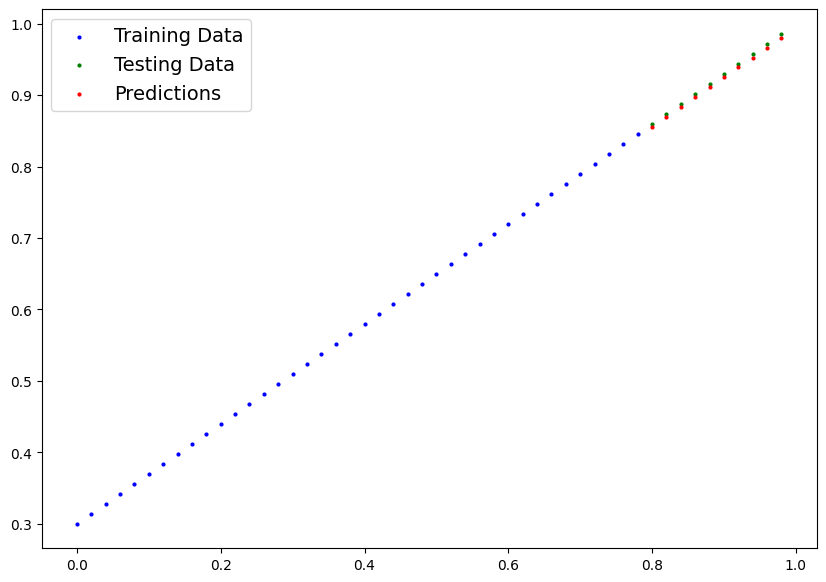

In [ ]:
# Plotting predictions with exactly 200 rounds of training
plot_predictions(predictions=y_preds_last)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [ ]:
weight,bias

(0.7, 0.3)

In [ ]:
epoch_count,loss_values,test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.0241, grad_fn=<MeanBackward0>),
  tensor(0.0207, grad_fn=<MeanBackward0>),
  tensor(0.0172, grad_fn=<MeanBackward0>),
  tensor(0.0138, grad_fn=<MeanBackward0>),
  tensor(0.0104, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0035, grad_fn=<MeanBackward0>),
  tensor(0.0026, grad_fn=<MeanBackward0>),
  tensor(0.0026, grad_fn=<MeanBackward0>),
  tensor(0.0026, grad_fn=<MeanBackward0>),
  tensor(0.0026, grad_fn=<MeanBackward0>),
  tensor(0.0026, grad_fn=<MeanBackward0>),
  tensor(0.0026, grad_fn=<MeanBackward0>),
  tensor(0.0026, grad_fn=<MeanBackward0>),
  tensor(0.0026, grad_fn=<MeanBackward0>),
  tensor(0.0026, grad_fn=<MeanBackward0>),
  tensor(0.0026, grad_fn=<MeanBackward0>),
  tensor(0.0026, grad_fn=<MeanBackward0>),
  tensor(0.0026, grad_fn=<MeanBackward0>),
  tensor(0.0026, grad_fn=<MeanBackward0>)],
 [tensor(

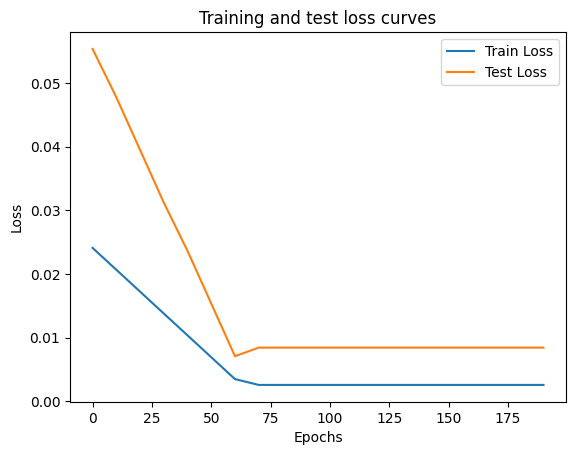

In [ ]:
# Plotting the loss curves
plt.plot(epoch_count,torch.tensor(loss_values).numpy(),label="Train Loss")
plt.plot(epoch_count,test_loss_values,label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## Saving a model in PyTorch
Saving models so we can reuse them.

There are 3 main methods one should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch Object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

Pickle library - https://docs.python.org/3/library/pickle.html

PyTorch documentation for saving and loading models - https://docs.pytorch.org/tutorials/beginner/saving_loading_models.html

Pro's and Con's for saving the entire model instead of the state dict - https://yassin01.medium.com/saving-and-loading-models-in-pytorch-best-practices-cc4ce58e5bd7


Saving to Google Drive from Google Colab - https://saturncloud.io/blog/how-to-save-files-from-google-colab-to-google-drive-a-stepbystep-guide/




In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create a models directory
MODEL_PATH = Path("models") # We will save all our models to this models directory
MODEL_PATH.mkdir(parents=True,exist_ok=True) # Makes the directory

# 2. Create a models save path (For the name with which the models is saved)
MODEL_NAME = "01_pytorch_workflow_model_0.pth" # Common extension is .pt or .pth
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME # Gives the path due to the / operator because of pathlib library

MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_0.pth')

`pathlib` Documentation - https://docs.python.org/3/library/pathlib.html

In [ ]:
# 3. Save the model state_dict (Recommended method). Can also save the entire model but not recommended
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


`torch.save()` Documenatation - https://docs.pytorch.org/docs/stable/generated/torch.save.html

In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Jun 15 18:00 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved state_dict() into that.

In [ ]:
# What we saved
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [ ]:
# Loading a saved Pytorch model state_dict - have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state dict of model_0 (this will update the new instance with updated parameters)

`torch.load()` Documentation - https://docs.pytorch.org/docs/stable/generated/torch.load.html

In [ ]:
# Before loading - Initial state - Random
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
# After loading
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [ ]:
# To test -> we make some prediction with our new loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [ ]:
# Compare loaded model preds with original model preds
y_preds_last == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

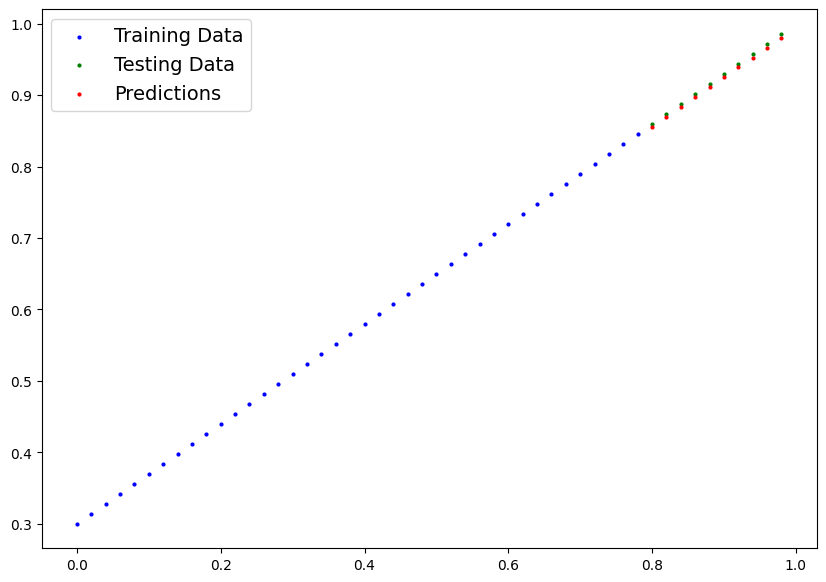

In [ ]:
plot_predictions(predictions=loaded_model_preds)

## Putting it all together
Combining all the above steps together and having them all in one place with device agnostic code

In [ ]:
# Importing PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
print(torch.__version__)

2.6.0+cu124


Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available()  else "cpu"

print(f"Device being used is: {device}")

Device being used is: cpu


### Data

In [ ]:
# Create some data using the linear regression  formula of y = weight * x + bias
weight = 0.79
bias = 0.44

# Create a range of values
start = 0
end = 1
step = 0.02

# Create X and y features and labels (X => features (Feature Matrix) and y-> labels)
X = torch.arange(start,end,step).unsqueeze(dim=1) # without unsqueeze, errors will pop up
y = weight * X + bias

In [ ]:
X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.4400],
         [0.4558],
         [0.4716],
         [0.4874],
         [0.5032],
         [0.5190],
         [0.5348],
         [0.5506],
         [0.5664],
         [0.5822]]))

In [ ]:
len(X),len(y)

(50, 50)

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

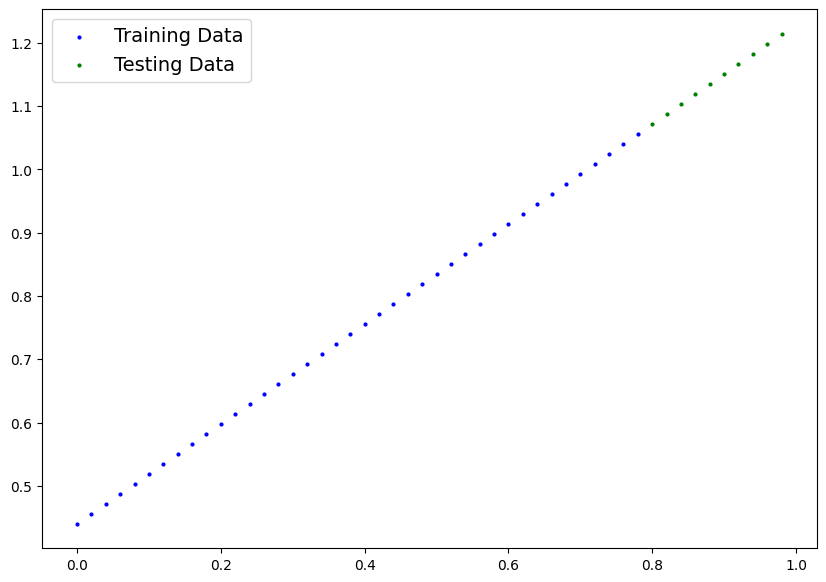

In [ ]:
# Plot the data
# Note: If you dont have the plot_predictions() function loaded, this will error
plot_predictions(X_train,y_train,X_test,y_test,predictions=None)

### Building a PyTorch Linear model

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Earlier we initialized the parameters ourselves using torch.randn and naming the parameters weight and bias and directly assigning the value. Here we
    # will use the power of torch.nn to initialize them automatically using a torch linear layer -> nn.Linear() for creating the model parameters
    # Also called Linear Transform, Probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,out_features=1) # in_features is input size and out_features is output size

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

`nn.Linear()` Documentation - https://docs.pytorch.org/docs/stable/generated/torch.nn.Linear.html

In [ ]:
# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### Training the model

For training we need:
* Loss Function
* Optimizer
* Training Loop
* Testing Loop

In [ ]:
# Setup the loss function
loss_fn = nn.L1Loss()

In [ ]:
# Setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [ ]:
# Writing the training loop
torch.manual_seed(42)
epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward Pass
  train_preds = model_1(X_train)

  # 2. Calculate the Loss
  loss = loss_fn(train_preds,y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform Backpropagation
  loss.backward()

  # 5. Gradient Descent - Optimizer step
  optimizer.step()


  ### Testing
  model_1.eval()

  with torch.inference_mode():
    test_preds = model_1(X_test)
    test_loss = loss_fn(test_preds,y_test)

  # Print out what's happening
  if epoch %10 ==0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.38007789850234985 | Test Loss: 0.3538762331008911
Epoch: 10 | Loss: 0.2648680806159973 | Test Loss: 0.2191663682460785
Epoch: 20 | Loss: 0.1496581733226776 | Test Loss: 0.08445654809474945
Epoch: 30 | Loss: 0.03997800499200821 | Test Loss: 0.041995931416749954
Epoch: 40 | Loss: 0.027643006294965744 | Test Loss: 0.06137595325708389
Epoch: 50 | Loss: 0.024126263335347176 | Test Loss: 0.055850934237241745
Epoch: 60 | Loss: 0.020694231614470482 | Test Loss: 0.04757843166589737
Epoch: 70 | Loss: 0.017255429178476334 | Test Loss: 0.039305854588747025
Epoch: 80 | Loss: 0.013824333436787128 | Test Loss: 0.031720198690891266
Epoch: 90 | Loss: 0.010390612296760082 | Test Loss: 0.023447657003998756
Epoch: 100 | Loss: 0.006951810326427221 | Test Loss: 0.015175104141235352
Epoch: 110 | Loss: 0.003522400511428714 | Test Loss: 0.007589459419250488
Epoch: 120 | Loss: 0.005486770533025265 | Test Loss: 0.009294629096984863
Epoch: 130 | Loss: 0.005486770533025265 | Test Loss: 0.0092946

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7874]])),
             ('linear_layer.bias', tensor([0.4465]))])

In [ ]:
weight,bias

(0.79, 0.44)

### Making and evaluating predictions

In [ ]:
# Model into eval mode
model_1.eval()

# Making predictions
with torch.inference_mode():
  y_latest_preds = model_1(X_test)
y_latest_preds

tensor([[1.0764],
        [1.0922],
        [1.1079],
        [1.1237],
        [1.1394],
        [1.1552],
        [1.1709],
        [1.1866],
        [1.2024],
        [1.2181]])

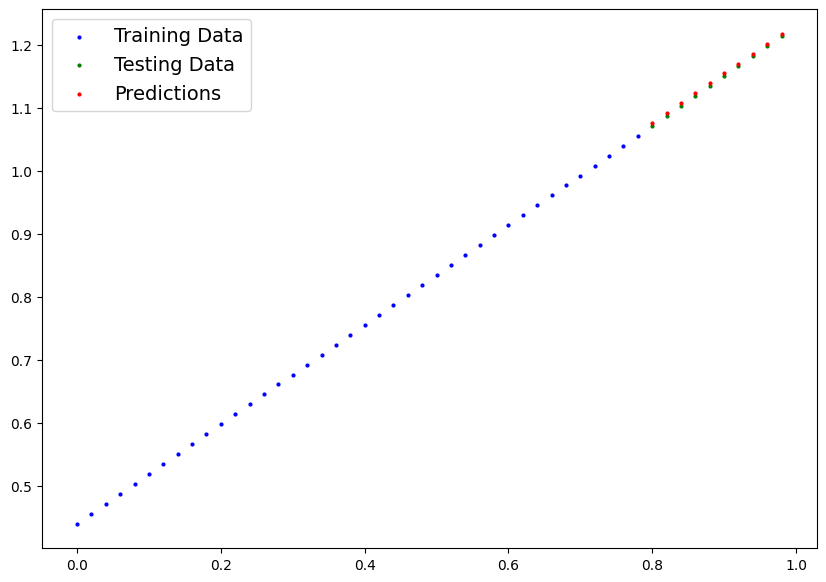

In [ ]:
plot_predictions(X_train,y_train,X_test,y_test,predictions=y_latest_preds.cpu())

### Saving and Loading a trained model

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_1.pth')

In [ ]:
# Save the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),f = MODEL_SAVE_PATH)

Saving model to models/01_pytorch_workflow_model_1.pth


In [ ]:
# Loading a PyTorch model
loaded_model_1 = LinearRegressionModelV2()

# Loafing the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7874]])),
             ('linear_layer.bias', tensor([0.4465]))])

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [ ]:
# Evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
loaded_model_1_preds

tensor([[1.0764],
        [1.0922],
        [1.1079],
        [1.1237],
        [1.1394],
        [1.1552],
        [1.1709],
        [1.1866],
        [1.2024],
        [1.2181]])

In [ ]:
y_latest_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

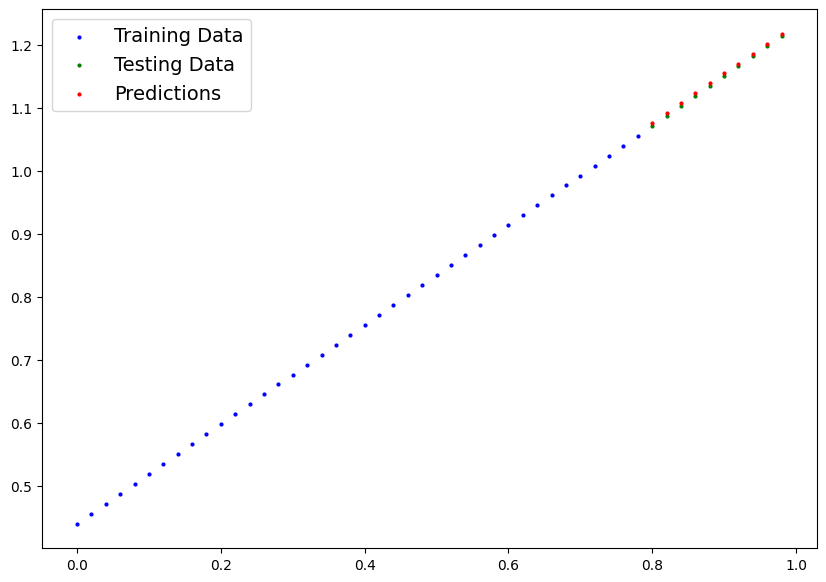

In [ ]:
plot_predictions(X_train,y_train,X_test,y_test,predictions=loaded_model_1_preds)

## Exercises & Extra-curriculum

Exercise Notebook: https://colab.research.google.com/drive/1bj9NcBtwkyPMIb8wX1Uk18Cf1tyJouFo?authuser=4

For Exercises and Extra-curriculum, refer to the online textbook: https://www.learnpytorch.io/01_pytorch_workflow/#exercises

